<a href="https://colab.research.google.com/github/abdallahrifatnassar/Computervision/blob/main/Learning_Based_Computer_Vision_Lab1_Requirment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [47]:
import os
import math

import numpy as np
import matplotlib.pyplot as plt

from skimage import io
import skimage 


import matplotlib.image as mpimg
import glob


from skimage.io import imread

# Download and organize the dataset (No Code required here)

In [2]:
%%capture

import requests
url = 'http://vision.soic.indiana.edu/egohands_files/egohands_data.zip'
r = requests.get(url, allow_redirects=True)
open('egohands_data.zip', 'wb').write(r.content)

!rm -r data
!rm -r temp
!mkdir data
!mkdir temp
!unzip egohands_data.zip -d temp/
!cp -r /content/temp/_LABELLED_SAMPLES/CARDS_OFFICE_B_S/* /content/data/
!rm /content/data/polygons.mat
!rm -r temp

# Read the images from the folder 'data' into a list



In [3]:
# os.listdir <-- you may want to use this function

dataset_dir = "data" # this is the directory of the dataset




# Your code here
imgs = os.listdir(dataset_dir)
##

# Define a function that takes a list of images then samples 9 iamges from the list, then draws them using matplotlib in a 3x3 grid

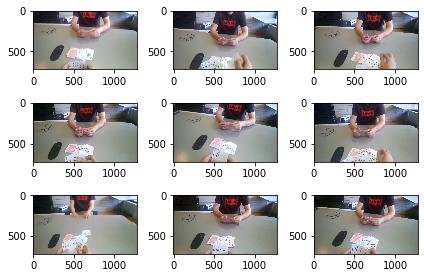

In [14]:
import random
from random import sample # u may need this library
random.seed(50) # set a seed in case you want your experiments to be consistent
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


import random
 

def draw_func(list_of_imgs,parent):
  n = 9
  i=0
  j=0
  fig, axes = plt.subplots(3, 3)
  for j in [0,1,2]:
    for imgfl in random.sample(list_of_imgs, n):
      if i==3:i=0
      filo= os.path.join(parent,imgfl)
      img = mpimg.imread(filo)
      if len(img.shape) < 3:
        axes[j, i].imshow(img, interpolation='none', cmap=plt.cm.gray)
      else:
        axes[j, i].imshow(img, interpolation='none')
      i+=1
    j+=1
  plt.tight_layout()
  plt.show() 




# ## Test your function here
draw_func(imgs,'/content/data') # assuming that imgs is the name of the list
# ##

# Apply Gray scaling on the images

In [16]:
# RUN FIRST TIME ONLY
directory = "grayscale"
  
  
# Path
path = os.path.join('/content', directory)
  
# Create the directory

os.mkdir(path, 0o666)
print("Directory '% s' created" % directory)
  

Directory 'grayscale' created


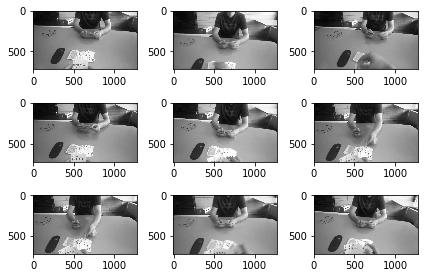

In [17]:
# skimage.color.rgb2gray(an_img) <-- you may want to check this function
import cv2
from skimage.color import rgb2gray
from PIL import Image
c=0
os.chdir('/content/data')
for filename in imgs:
    os.chdir('/content/data')
    name='grayimg'+str(c)+'.jpg'
    filo= os.path.join('/content/data',filename)
    gimg = mpimg.imread(filo)
    rgb_im = cv2.cvtColor(gimg, cv2.COLOR_BGR2GRAY)
    os.chdir('/content/grayscale')
    img = cv2.imwrite(name, rgb_im)
    c+=1
os.chdir('/content')
gray_scale_imgs = os.listdir('/content/grayscale')

# Use your draw function to visualize the images
draw_func(gray_scale_imgs,'/content/grayscale') # assuming that gray_scale_imgs is the name of the list

# Apply histogram equalization on the gray scale images

In [18]:
#RUN FIRST TIME ONLY
directory = "equalize"
  
#%cd 'content'
# Path
path = os.path.join('/content', directory)
  
# Create the directory

os.mkdir(path, 0o666)
print("Directory '% s' created" % directory)

Directory 'equalize' created


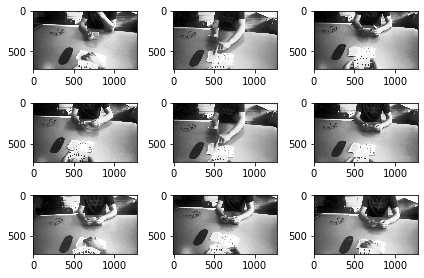

In [19]:
from skimage import exposure # You will probably need this function

# Your code here
c=0
os.chdir('/content/grayscale')
for filename in gray_scale_imgs:
    os.chdir('/content/grayscale')
    name='eqimg'+str(c)+'.jpg'
    filo= os.path.join('/content/grayscale',filename)
    gimg = mpimg.imread(filo)
    eq_im = cv2.equalizeHist(gimg)
    os.chdir('/content/equalize')
    img = cv2.imwrite(name, eq_im)
    c+=1
os.chdir('/content')
equ_imgs = os.listdir('/content/equalize')

##




# Use your draw function to visualize the images
draw_func(equ_imgs,'/content/equalize')

# Apply sobel edge detection on the equalized images

In [20]:
#RUN FIRST TIME ONLY
directory = "sobel"
  
#%cd 'content'
# Path
path = os.path.join('/content', directory)
  
# Create the directory

os.mkdir(path, 0o666)
print("Directory '% s' created" % directory)

Directory 'sobel' created


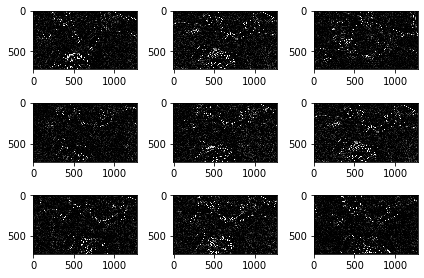

In [70]:
from skimage.filters import sobel # You will probably need this function


# Your code here
c=0
os.chdir('/content/equalize')
for filename in equ_imgs:
    os.chdir('/content/equalize')
    name='eqimg'+str(c)+'.jpg'
    filo= os.path.join('/content/equalize',filename)
    gimg = mpimg.imread(filo)
    sobel = cv2.Sobel(src=gimg, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
    os.chdir('/content/sobel')
    cv2.imwrite(name, sobel)
    c+=1
os.chdir('/content')
sobel_imgs = os.listdir('/content/sobel')

##




# Use your draw function to visualize the images
draw_func(sobel_imgs,'/content/sobel')

# Apply Gaussian derivative over the equalized images

In [48]:
#RUN FIRST TIME ONLY
directory = "mag"
  
#%cd 'content'
# Path
path = os.path.join('/content', directory)
  
# Create the directory

os.mkdir(path, 0o666)
print("Directory '% s' created" % directory)

Directory 'mag' created


In [49]:
#RUN FIRST TIME ONLY
directory = "ang"
  
#%cd 'content'
# Path
path = os.path.join('/content', directory)
  
# Create the directory

os.mkdir(path, 0o666)
print("Directory '% s' created" % directory)

Directory 'ang' created


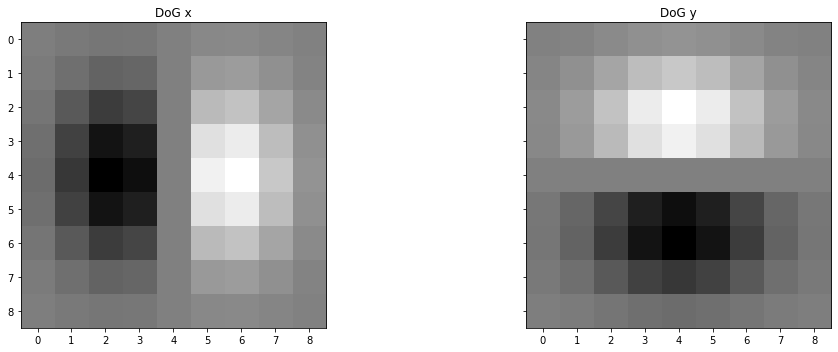

In [34]:
import scipy.ndimage

weights = np.zeros((9, 9))
weights[4,4] = 1.0
gaussF = scipy.ndimage.filters.gaussian_filter(weights, 1.5, order=0,truncate=3.0)

#Sobel mask in x
weights = np.zeros((3,3))
weights[:,0] = -np.ones((3,)) 
weights[:,2] = np.ones((3,)) 
DoGx = scipy.ndimage.convolve(gaussF, weights)

#Sobel mask in y
weights = np.zeros((3,3))
weights[0,:] = np.ones((3,)) 
weights[2,:] = -np.ones((3,)) 
DoGy = scipy.ndimage.convolve(gaussF, weights)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(16, 5))
ax[0].imshow(DoGx, cmap=plt.cm.gray)
ax[0].set_title('DoG x')

ax[1].imshow(DoGy, cmap=plt.cm.gray)
ax[1].set_title('DoG y')

plt.tight_layout()
# save_fig("DoG")
plt.show()

In [40]:
type(equ_imgs[0])


str

In [64]:
os.chdir('/content/equalize')
filo= os.path.join('/content/equalize',equ_imgs[0])
gimg = mpimg.imread(filo)

devX = cv2.filter2D(src=gimg, ddepth=-1, kernel=DoGx)

devY = cv2.filter2D(src=gimg, ddepth=-1, kernel=DoGy)

mag = np.sqrt(np.square(devX) + np.square(devY))


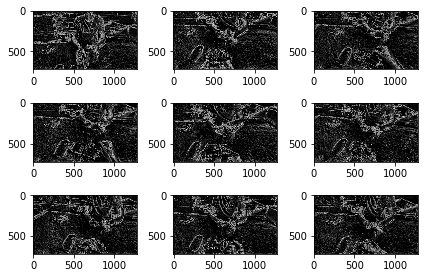

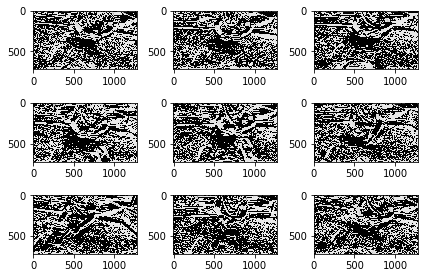

In [89]:
# you better check lab 1 notebook
# Your code here
c=0
os.chdir('/content/equalize')
for filename in equ_imgs:
    os.chdir('/content/equalize')
    name='magimg'+str(c)+'.jpg'
    name2='angimg'+str(c)+'.jpg'

    filo= os.path.join('/content/equalize',filename)
    gimg = mpimg.imread(filo)

    img_blur = cv2.GaussianBlur(gimg, (3,3), 0)

    devX = cv2.filter2D(src=img_blur, ddepth=-1, kernel=DoGx)
    devY = cv2.filter2D(src=img_blur, ddepth=-1, kernel=DoGy)

    mag = np.sqrt(np.square(devX) + np.square(devY)).astype(np.uint8)
    ang = (np.arctan2(-devY,devX) * (180/ math.pi)).astype(np.uint8)


    os.chdir('/content/mag')
    cv2.imwrite(name, mag)

    os.chdir('/content/ang')
    img2 = cv2.imwrite(name2, ang)

    c+=1
os.chdir('/content')
mag_imgs = os.listdir('/content/mag')
angle = os.listdir('/content/ang')


##




# Use your draw function to visualize the magnitude
draw_func(mag_imgs,'/content/mag')

# Use your draw function to visualize the orientation
draw_func(angle,'/content/ang')